In [1]:
# imporing the data
import pandas as pd
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# Check for missing values
ms = df.isnull().sum()
print(ms)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


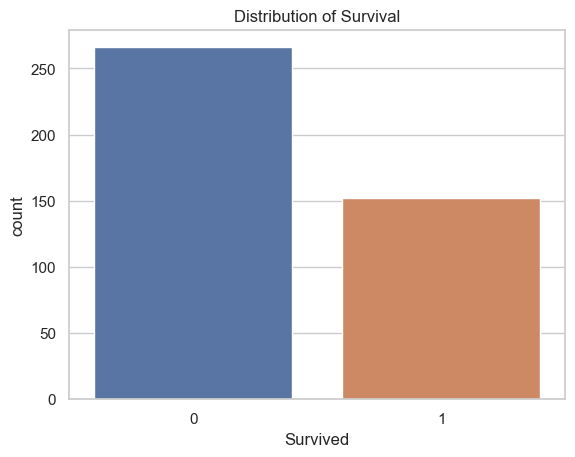

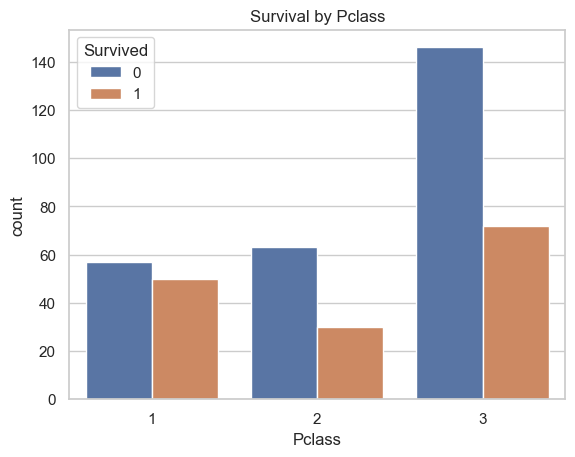

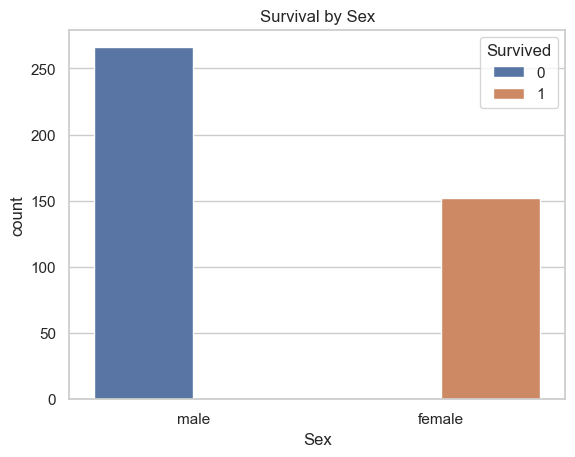

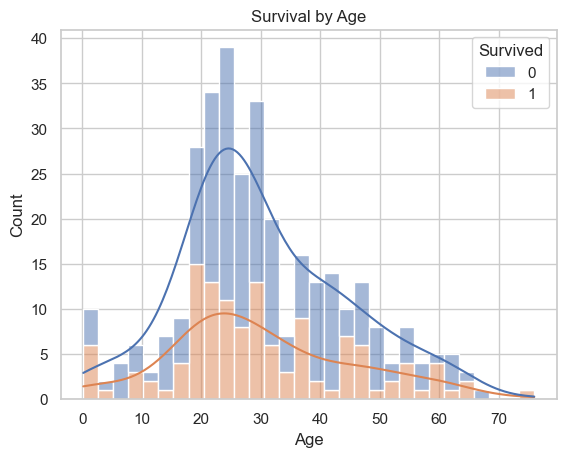

In [3]:
# doing the exploratory data analysis (EDA) for more information

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for the distribution of survival
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()

# Compare survival with Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()

# Compare survival with Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

# Compare survival with Age
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Survival by Age')
plt.show()


In [5]:
# data cleaning and preprocessing

df_new=df.drop(columns=['PassengerId','Pclass','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)
df_new=df_new.replace(['male','female'],[0,1])
df_new=df_new.fillna(0)
df_new.head()

,Survived,Name,Sex,Age
0,0,"Kelly, Mr. James",0,34.5
1,1,"Wilkes, Mrs. James (Ellen Needs)",1,47.0
2,0,"Myles, Mr. Thomas Francis",0,62.0
3,0,"Wirz, Mr. Albert",0,27.0
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0


In [12]:
# building the model using sklearn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
X=df_new[['Sex','Age']]
y=df_new['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()

# traning the model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)




# Evaluation of model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is : ",accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))









Accuracy is :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



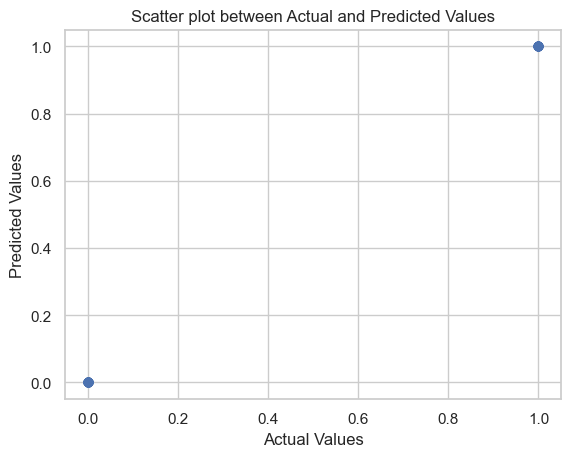

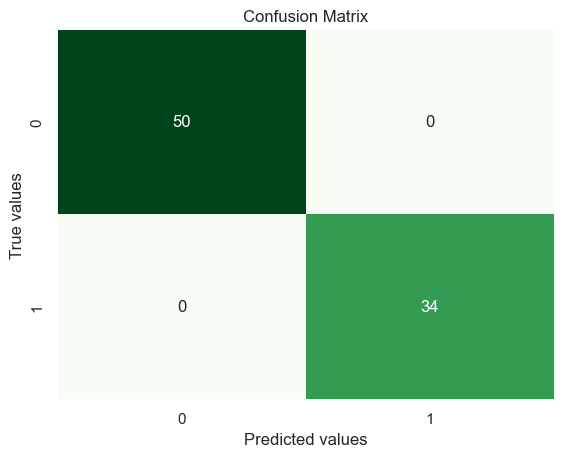

In [17]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, alpha=1.0)
plt.title('Scatter plot between Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Saving the model

import joblib
joblib.dump(model, 'titanic_predict.pkl')


['titanic_predict.pkl']